In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_text
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

df= pd.read_csv('C:/Users/rozar/Documents/csv/project csv/Mushroom.csv')

In [2]:
df


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
##lABEL ENCODER TO CONVERT THE DATASET
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [9]:
df.shape

(8124, 23)

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [13]:
df['class'].value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

In [15]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [17]:
##classifying Class as target vgariable based on Mushroom edibility as 'Edibile' and 'Poisionous'

df = df.sample(frac = 1)
df.columns = ['target', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [19]:
#for label in df.columns:
  #  df[label] = LabelEncoder().fit(df[label]).transform(df[label])
    
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 8124 entries, 795 to 4376
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   target                    8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null   i

In [21]:
df = df.drop(["veil-type"],axis=1)

In [14]:
df

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2970,0,2,0,4,1,5,1,0,0,5,...,2,2,3,3,2,1,4,2,5,0
6362,1,2,2,2,0,2,1,0,1,0,...,2,1,7,6,2,1,0,7,4,2
6626,1,5,2,4,0,8,1,0,1,0,...,2,1,6,7,2,1,0,7,4,0
5147,1,5,3,4,0,8,1,0,1,0,...,1,2,7,7,2,1,0,7,4,0
4051,1,5,0,5,0,1,1,1,1,9,...,2,2,7,7,2,1,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0,0,3,8,1,3,1,0,0,2,...,2,2,7,7,2,1,4,3,3,1
413,0,5,3,9,1,3,1,0,0,5,...,2,3,7,7,2,1,4,2,5,1
151,0,5,2,4,0,5,1,1,0,7,...,0,2,7,7,2,1,0,3,0,1
903,0,5,2,8,0,5,1,1,0,3,...,0,2,7,7,2,1,0,3,3,1


C:\Users\rozar\AppData\Local\Temp\ipykernel_33140\3483797679.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="target", y=df['target'].index, palette='mako', data=df)


<Axes: xlabel='target', ylabel='None'>

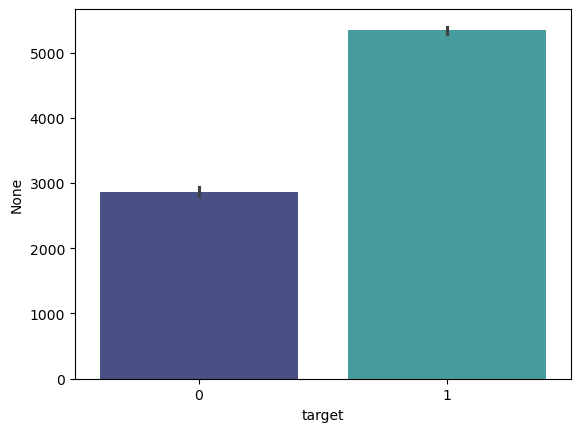

In [23]:
sns.barplot(x="target", y=df['target'].index, palette='mako', data=df)

C:\Users\rozar\AppData\Local\Temp\ipykernel_33140\3501772338.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="population", y=df['target'].index, palette='mako', data=df)


<Axes: xlabel='population', ylabel='None'>

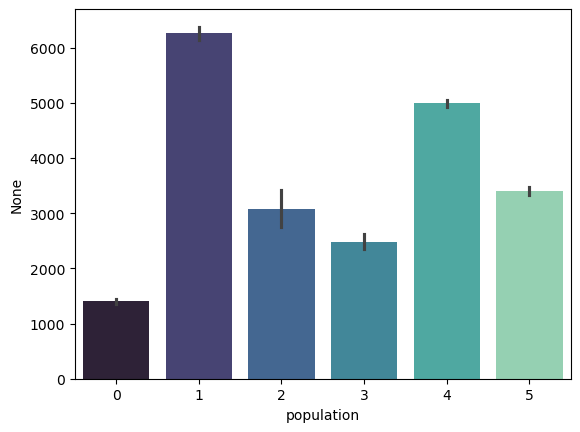

In [25]:
sns.barplot(x="population", y=df['target'].index, palette='mako', data=df)

In [ ]:
#The number of poisonous mushrooms is almost twice the number of normal mushrooms. There is an imbalance data problem.


In [27]:
df.corr()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
target,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [29]:
X= df.drop(['target'],axis =1)
y = df['target']



In [122]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.3)
model = DecisionTreeClassifier(criterion ='entropy', max_depth = 1)
AdaBoost = AdaBoostClassifier(model, n_estimators =400 ,learning_rate =1)
#AdaBoost = AdaBoostClassifier( n_estimators =400 ,learning_rate =1, algorithm ='SAMME')

boostmodel =AdaBoost.fit(X_train, y_train)

y_pred = boostmodel.predict(X_test)


C:\Users\rozar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [124]:
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [126]:
prediction = metrics.accuracy_score(y_test,y_pred)

print("The accuracy is :", prediction * 100, '%')

The accuracy is : 100.0 %


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1265
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [41]:
##test
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [43]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=2)
clf = clf.fit(X, y)

In [45]:
clf

DecisionTreeClassifier(max_depth=2, random_state=0)

[Text(0.5, 0.8333333333333334, 'x[8] <= 3.5\ngini = 0.499\nsamples = 8124\nvalue = [4208, 3916]'),
 Text(0.25, 0.5, 'x[19] <= 3.5\ngini = 0.276\nsamples = 3308\nvalue = [548, 2760]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.216\nsamples = 584\nvalue = [512, 72]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.026\nsamples = 2724\nvalue = [36, 2688]'),
 Text(0.75, 0.5, 'x[18] <= 1.5\ngini = 0.365\nsamples = 4816\nvalue = [3660, 1156]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.209\nsamples = 708\nvalue = [84, 624]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.225\nsamples = 4108\nvalue = [3576, 532]')]

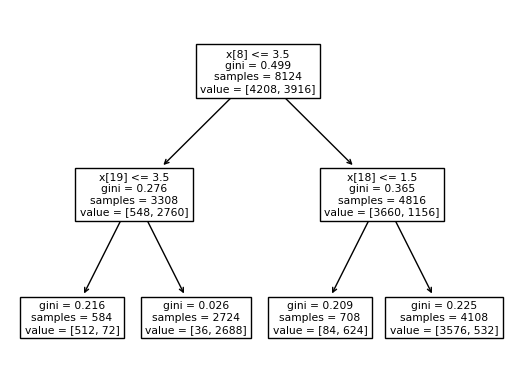

In [47]:
tree.plot_tree(clf)

In [49]:
y_pred1 = clf.predict(X_test)

In [51]:
y_pred1

array([0, 0, 1, ..., 1, 1, 1])

In [53]:
prediction1 = metrics.accuracy_score(y_test,y_pred1)


print("The accuracy is :", prediction1 * 100, '%')

The accuracy is : 91.1402789171452 %


In [55]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1278
           1       0.96      0.85      0.90      1160

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438



In [57]:
features =['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color','population', 'habitat']

In [59]:
r = export_text(clf, feature_names= features)
print(r)

|--- gill-color <= 3.50
|   |--- population <= 3.50
|   |   |--- class: 0
|   |--- population >  3.50
|   |   |--- class: 1
|--- gill-color >  3.50
|   |--- spore-print-color <= 1.50
|   |   |--- class: 1
|   |--- spore-print-color >  1.50
|   |   |--- class: 0



In [61]:
#Predict the values 
y_pred_gini = clf.predict(X_test)

In [63]:
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf.predict(X_train)

y_pred_train_gini

array([1, 1, 0, ..., 0, 0, 0])

In [65]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Model accuracy score with criterion gini index: 0.9114
Training-set accuracy score: 0.9107
Test set score: 0.9114


In [67]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [69]:
#Predict the values 
y_pred_en = clf_en.predict(X_test)  

In [71]:
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(X_train)

In [73]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9557
Training-set accuracy score: 0.9578


In [75]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9578
Test set score: 0.9557


In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1204   74]
 [  34 1126]]


In [79]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1278
           1       0.94      0.97      0.95      1160

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [81]:
f1_score = f1_score(y_test, y_pred_en)
print("F1 Score:",f1_score)

F1 Score: 0.9542372881355933


In [83]:
###
## Decision-Tree Classifier model using both gini index and entropy have only very very small difference in model accuracy and training set accuracy, so there is no sign of overfitting.

# Implementing Random Forest

In [87]:
np.random.seed(42)

modelRR =RandomForestRegressor(n_estimators =100)
modelRR.fit(X_train,y_train)

RandomForestRegressor()

In [88]:
modelRR.score(X_test,y_test)

0.9999925995628947

In [91]:
y_pred_rr = modelRR.predict(X_test)  

In [93]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_rr})
df

,Actual,Predicted
1013,0,0.0
1892,0,0.0
3737,1,1.0
5233,0,0.0
1971,0,0.0
...,...,...
5357,1,1.0
5068,1,1.0
6187,1,1.0
6520,1,1.0


In [95]:
len(y_pred_rr)

2438

In [97]:
modelRR.score(X_test,y_pred_rr)

1.0

In [99]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr)))

Mean Absolute Error: 8.61361771944217e-05
Mean Squared Error: 1.8457752255947518e-06
Root Mean Squared Error: 0.0013585931052359833


In [101]:
# Calculate the absolute errors
errors = abs(y_pred_rr - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0 degrees.
Accuracy: -inf %.


In [107]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [103]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
Tree1 = modelRR.estimators_[5]
# Importregressor tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
Tree1 = modelRR.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree1,filled=True, 
              rounded=True, 
              fontsize=14);

ModuleNotFoundError: No module named 'pydot'

In [109]:
from sklearn.metrics import r2_score
y_test_mean = np.full(len(y_test),y_test.mean())

In [111]:
y_test.mean()

0.47579983593109104

In [113]:
 r2_score(y_test,y_test_mean)

0.0

In [115]:
 r2_score(y_test,y_test)

1.0

In [128]:
#Main insights resulting from above barplots and contingency tables are:

#* only poisonous mushrooms have convex cap-shape; only edible mushrooms have sunken cap-shape
#* only poisonous mushrooms have cap-surface with grooves
#* only edible mushrooms have green or purple cap-color
#* odor is strongly indicative of what mushrooms are (edible/poisonous)
#* only poisonous mushrooms have buff or green gill color
#* only edible mushrooms have red or orange gill color
#* only edible mushrooms have rooted stalk root
#* stalk_color_above_ring and stalk_color_below_ring are relevant features for out classification problem
#* only edible mushrooms have brown veil color
#* only poisonous mushrooms have yellow veil color
#* only poisonous mushrooms do not have rings
#* only edible mushrooms have flaring ring type
#* only poisonous mushrooms have none ring type